# Multi-Layer Perceptron (MLP)  - شبکه عصبی پرسپترون چند لایه

### پرسپترون
      
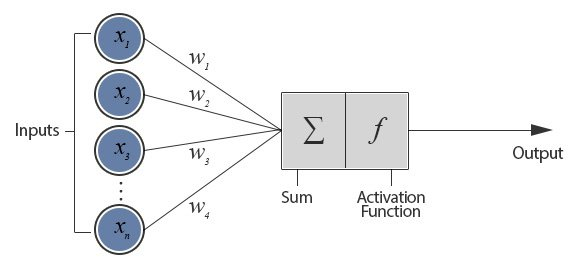 


### شبکه عصبی پرسپترون چند لایه از چندین لایه متصل به هم تشکیل شده است

    لایه ورودی : این لایه، اولین لایه شبکه عصبی است که داده‌های ورودی را دریافت می‌کند , وظیفه آن، ارسال داده‌ها به لایه بعدی است   

    لایه پنهان : لایه‌های پنهان می‌توانند بیش از یک لایه باشند. این لایه‌ها از نورون‌هایی تشکیل شده‌اند که وظیفه انجام محاسباتی را بر روی ورودی‌های خود بر عهده دارند و خروجی حاصل شده از محاسبات را به لایه بعد خود منتقل می‌کنند

    لایه خروجی : این لایه، مقدار خروجی نهایی شبکه را مشخص می‌کند. ورودی این لایه، خروجی‌های لایه پنهان است
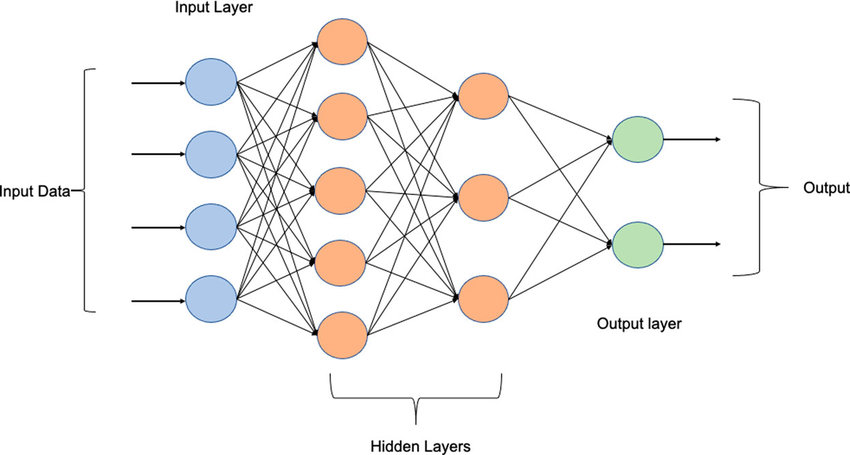


### Fully Connected Neural Network (FCNN)  -   شبکه عصبی کاملا متصل


    A fully connected multi-layer neural network is called a Multilayer Perceptron (MLP).
    
    هر لایه شامل گروهی از سلول‌های عصبی (نورون) است که عموماً با کلیهٔ نورون‌های لایه‌های دیگر در ارتباط هستند

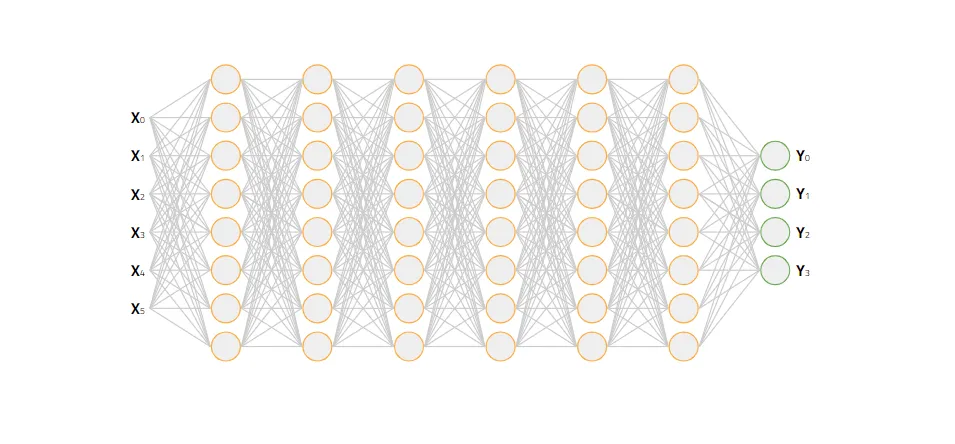





In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# MNIST dataset
wikipedia: The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems

https://pytorch.org/vision/main/datasets.html

## Classify hand written numbers (  دسته بندی اعداد دست‌نویس‌شده)

# Multilayer Perceptron - MLP
    تعداد نورون‌های لایه ورودی شبکه پرسپترون چند لایه برابر با اندازه داده‌های ورودی است و تعداد نورون‌های لایه خروجی، برابر با تعداد دسته‌های تعریف شده برای مسئله است. هر چقدر تعداد لایه‌های میانی (لایه پنهان) بیشتر باشد، شبکه نهایی می‌تواند از پس مسائل پیچیده‌تری برآید.

![](https://github.com/bentrevett/pytorch-image-classification/blob/master/assets/mlp-mnist.png?raw=1)


In [ ]:

training_dataset = torchvision.datasets.MNIST(root='./data', train=True , transform = transforms.ToTensor(),download=True )
test_dataset     = torchvision.datasets.MNIST(root='./data', train=False, transform = transforms.ToTensor(),download=False)

In [ ]:
len(training_dataset)

In [ ]:
len(test_dataset)

# DataLoader
    DataLoader(dataset, batch_size=1, shuffle=False, sampler=None,
           batch_sampler=None, num_workers=0, collate_fn=None,
           pin_memory=False, drop_last=False, timeout=0,
           worker_init_fn=None, *, prefetch_factor=2,
           persistent_workers=False)

In [ ]:
#images have size of 28 x 28
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

batch_size    = 100


In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size=batch_size,  shuffle=True)
test_loader  = torch.utils.data.DataLoader(dataset=test_dataset,     batch_size=batch_size,  shuffle=False)

In [ ]:
sample, label = next(iter(train_loader))
print('sample size: ',sample.shape, '\nlabel  size: ',label.shape)

In [ ]:
# sample[0][0]

In [ ]:
# let's see 6 examples
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(sample[i][0],cmap='gray')
plt.show()

In [ ]:
class MLP10(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear( input_size, hidden_size)
        
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, hidden_size)
        
        self.fc5 = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))  # input   + activation
        x = self.relu(self.fc2(x))  # hidden  + activation
        x = self.relu(self.fc3(x))  # hidden  + activation
        x = self.relu(self.fc4(x))  # hidden  + activation
        output = self.fc5(x)        # outout
        return output


In [ ]:
input_size    = 784 #28 x 28 = 784
hidden_size   = 100
num_classes   = 10

model = MLP10(input_size, hidden_size, num_classes).to(device)
model

In [ ]:
# for name, param in model.named_parameters():
#     print(f"Layer Name: {name}\nLayer Size: {param.size()}\nWeight Values : {param[0]}\n {'-'*50}")

# Loss & Optimizer

In [ ]:
learning_rate = 0.001

loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)



 # Training loop

In [ ]:
num_epochs    = 5

for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        
        #forward
        pred_labels = model(images)
        l = loss(pred_labels, labels)
        #backward
        
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        
        if (i+1)% 100 ==0:
            print(f'epoch: {epoch+1}/{num_epochs}, step {i+1}/{len(train_loader)}, loss = {l.item():.4f}')

# Test

In [ ]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:

        outputs = model(images)
        
        # value & index
        _, predictions =torch.max(outputs, 1)
        n_samples += labels.shape[0]

        n_correct += (predictions == labels).sum().item()
   
    accuracy = 100.0 * n_correct/n_samples
    print(f'accuracy: {accuracy}')

In [ ]:
from PIL import Image
image = Image.open('3.png') 
image

In [ ]:
image = transforms.functional.invert(image)
image

In [ ]:
transform = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                transforms.Resize((28, 28)),
                                transforms.ToTensor()])
image = transform(image)


In [ ]:
transform =  transforms.ToPILImage()
out = transform(image)
out

In [ ]:
image.shape

In [ ]:
unsqueeze_image= image.unsqueeze(0)   # Add an extra dimension to simulate batch size of 1
unsqueeze_image.shape

In [ ]:
with torch.no_grad():
    output = model(unsqueeze_image)
output

In [ ]:
predicted_class = torch.argmax(output)
predicted_class